# Missing Values Analysis and Imputation
 
For this we will use the Pima indians diabetes dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
animals = pd.read_csv("C:/Users/Xnes/DataScience/data/mammalsleep.csv")
animals = animals.iloc[:,1:12]
animals.head()

,species,bw,brw,sws,ps,ts,mls,gt,pi,sei,odi
0,African elephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
1,African giant pouched rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
2,Arctic Fox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
3,Arctic ground squirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
4,Asian elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4


<u>Mammal Sleep Dataset</u>

<table>
    <tr><th>species</th><td>Species of animal</td></tr>
    <tr><th>bw</th><td> Body weight (kg)</td></tr>
    <tr><th>brw</th><td> Brain weight (g)</td></tr>
    <tr><th>sws</th><td> Slow wave ("nondreaming") sleep (hrs/day)</td></tr>
    <tr><th>ps</th><td> Paradoxical ("dreaming") sleep (hrs/day)</td></tr>
    <tr><th>ts</th><td> Total sleep (hrs/day) (sum of slow wave and paradoxical sleep)</td></tr>
    <tr><th>mls</th><td> Maximum life span (years)</td></tr>
    <tr><th>gt</th><td> Gestation time (days)</td></tr>
    <tr><th>pi</th><td> Predation index (1-5), 1 = least likely to be preyed upon</td></tr>
    <tr><th>sei</th><td> Sleep exposure index (1-5), 1 = least exposed (e.g. animal sleeps in a well-protected den), 5 = most exposed</td></tr>
    <tr><th>odi</th><td> Overall danger index (1-5) based on the above two indices and other information, 1 = least danger (from other animals), 5 = most danger (from other animals)</td></tr>
</table>


In [3]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  62 non-null     object 
 1   bw       62 non-null     float64
 2   brw      62 non-null     float64
 3   sws      48 non-null     float64
 4   ps       50 non-null     float64
 5   ts       58 non-null     float64
 6   mls      58 non-null     float64
 7   gt       58 non-null     float64
 8   pi       62 non-null     int64  
 9   sei      62 non-null     int64  
 10  odi      62 non-null     int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 5.5+ KB


In [4]:
print(animals.isnull().sum())

species     0
bw          0
brw         0
sws        14
ps         12
ts          4
mls         4
gt          4
pi          0
sei         0
odi         0
dtype: int64


In [5]:
animals.describe()


,bw,brw,sws,ps,ts,mls,gt,pi,sei,odi
count,62.000000,62.000000,48.000000,50.000000,58.000000,58.000000,58.000000,62.000000,62.000000,62.000000
mean,198.789984,283.134194,8.672917,1.972000,10.532759,19.877586,142.353448,2.870968,2.419355,2.612903
std,899.158011,930.278942,3.666452,1.442651,4.606760,18.206255,146.805039,1.476414,1.604792,1.441252
min,0.005000,0.140000,2.100000,0.000000,2.600000,2.000000,12.000000,1.000000,1.000000,1.000000
25%,0.600000,4.250000,6.250000,0.900000,8.050000,6.625000,35.750000,2.000000,1.000000,1.000000
50%,3.342500,17.250000,8.350000,1.800000,10.450000,15.100000,79.000000,3.000000,2.000000,2.000000
75%,48.202500,166.000000,11.000000,2.550000,13.200000,27.750000,207.500000,4.000000,4.000000,4.000000
max,6654.000000,5712.000000,17.900000,6.600000,19.900000,100.000000,645.000000,5.000000,5.000000,5.000000


## Checking the Missing Mechanisms


In [6]:
### pip install missingno
import missingno as msno

### plot the missingness (nullity) matrix
missingdata_df = animals.columns[animals.isnull().any()].tolist()
msno.matrix(animals[missingdata_df])


ModuleNotFoundError: No module named 'missingno'

In [7]:
## missingness correlation heatmap

msno.heatmap(animals[missingdata_df], figsize=(5,5))

NameError: name 'msno' is not defined

In [8]:
# [['sws','ps','ts','mls','gt']]
animals2 = animals.copy()

animals2['sws_na'] = 0
animals2.loc[(animals2['sws'].isnull()),['sws_na']] = 1

animals2['ps_na'] = 0
animals2.loc[(animals2['ps'].isnull()),['ps_na']] = 1

animals2['ts_na'] = 0
animals2.loc[(animals2['ts'].isnull()),['ts_na']] = 1

animals2['mls_na'] = 0
animals2.loc[(animals2['mls'].isnull()),['mls_na']] = 1

animals2['gt_na'] = 0
animals2.loc[(animals2['gt'].isnull()),['gt_na']] = 1

animals2.head()


,species,bw,brw,sws,ps,ts,mls,gt,pi,sei,odi,sws_na,ps_na,ts_na,mls_na,gt_na
0,African elephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3,1,1,0,0,0
1,African giant pouched rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,0,0,0,0,0
2,Arctic Fox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1,1,1,0,0,0
3,Arctic ground squirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3,1,1,0,1,0
4,Asian elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,0,0,0,0,0


In [9]:
from sklearn.linear_model import LogisticRegression

X_train = animals2.copy()
#X_train.dropna(inplace=True)
y_train = X_train.loc[:,('sws_na')]
X_train = X_train.loc[:,('bw','brw','pi','sei','odi')]

X_test = animals2.loc[(animals2['sws'].isnull()),('bw','brw','pi','sei','odi')]


In [10]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


C:\Users\Xnes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [11]:
import statsmodels.api as sm

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                 sws_na   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     1.832
Date:                Wed, 16 Sep 2020   Prob (F-statistic):              0.121
Time:                        15:28:45   Log-Likelihood:                -29.213
No. Observations:                  62   AIC:                             70.43
Df Residuals:                      56   BIC:                             83.19
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1407      0.118      1.191      0.2

In [12]:
print(animals2.loc[:,('sei','sws_na')].groupby(['sei']).count())

     sws_na
sei        
1        27
2        13
3         4
4         5
5        13


sws_na   0  1
sei          
1       23  4
2       10  3
3        4  0
4        4  1
5        7  6


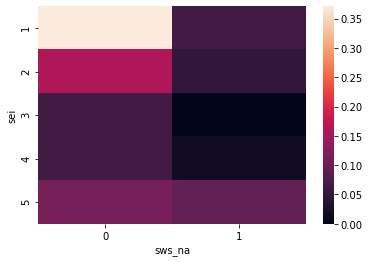

In [13]:
print(pd.crosstab(animals2['sei'],animals2['sws_na']))
#print(pd.crosstab(animals2['sei'],animals2['sws_na'])//62)
sns.heatmap(pd.crosstab(animals2['sei'],animals2['sws_na'])/62)


# Missing Values Imputation

### Dropout

In [14]:
#animals2 = animals[['sws','ps','ts','mls','gt']].replace(0, np.NaN)
animals2 = animals.copy()
# drop rows with missing values
animals2.dropna(inplace=True)
# summarize the number of rows and columns in the dataset
print(animals2.shape)


(42, 11)


From 62 rows initially, we have 41 rows now...

In [15]:
print(animals.describe())
print("----------------------------------------------------------------------------------")
print(animals2.describe())

                bw          brw        sws         ps         ts         mls  \
count    62.000000    62.000000  48.000000  50.000000  58.000000   58.000000   
mean    198.789984   283.134194   8.672917   1.972000  10.532759   19.877586   
std     899.158011   930.278942   3.666452   1.442651   4.606760   18.206255   
min       0.005000     0.140000   2.100000   0.000000   2.600000    2.000000   
25%       0.600000     4.250000   6.250000   0.900000   8.050000    6.625000   
50%       3.342500    17.250000   8.350000   1.800000  10.450000   15.100000   
75%      48.202500   166.000000  11.000000   2.550000  13.200000   27.750000   
max    6654.000000  5712.000000  17.900000   6.600000  19.900000  100.000000   

               gt         pi        sei        odi  
count   58.000000  62.000000  62.000000  62.000000  
mean   142.353448   2.870968   2.419355   2.612903  
std    146.805039   1.476414   1.604792   1.441252  
min     12.000000   1.000000   1.000000   1.000000  
25%     35.750

### Statistical Imputation
 
This imply to substitute missing values by a statistical measure. The most commonly used are the mean and the median.

In [16]:
##### indicate the missing points with one_zero 
# [['sws','ps','ts','mls','gt']]
animals2 = animals.copy()

animals2['sws_na'] = 0
animals2.loc[(animals2['sws'].isnull()),['sws_na']] = 1

animals2['ps_na'] = 0
animals2.loc[(animals2['ps'].isnull()),['ps_na']] = 1

animals2['ts_na'] = 0
animals2.loc[(animals2['ts'].isnull()),['ts_na']] = 1

animals2['mls_na'] = 0
animals2.loc[(animals2['mls'].isnull()),['mls_na']] = 1

animals2['gt_na'] = 0
animals2.loc[(animals2['gt'].isnull()),['gt_na']] = 1

animals2.head()


,species,bw,brw,sws,ps,ts,mls,gt,pi,sei,odi,sws_na,ps_na,ts_na,mls_na,gt_na
0,African elephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3,1,1,0,0,0
1,African giant pouched rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,0,0,0,0,0
2,Arctic Fox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1,1,1,0,0,0
3,Arctic ground squirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3,1,1,0,1,0
4,Asian elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,0,0,0,0,0


In [17]:
# impute mean for the following vars: sws, ps, ts, mls, gt
sws_mean = animals2['sws'].mean()
animals2['sws'] = animals2['sws'].fillna(sws_mean)

ps_mean = animals2['ps'].mean()
animals2['ps'] = animals2['ps'].fillna(ps_mean)

ts_mean = animals2['ts'].mean()
animals2['ts'] = animals2['ts'].fillna(ts_mean)

mls_mean = animals2['mls'].mean()
animals2['mls'] = animals2['mls'].fillna(mls_mean)

gt_mean = animals2['gt'].mean()
animals2['gt'] = animals2['gt'].fillna(gt_mean)

# summarize the number of rows and columns in the dataset
print(animals2.shape)
animals2.head()

(62, 16)


,species,bw,brw,sws,ps,ts,mls,gt,pi,sei,odi,sws_na,ps_na,ts_na,mls_na,gt_na
0,African elephant,6654.000,5712.0,8.672917,1.972,3.3,38.600000,645.0,3,5,3,1,1,0,0,0
1,African giant pouched rat,1.000,6.6,6.300000,2.000,8.3,4.500000,42.0,3,1,3,0,0,0,0,0
2,Arctic Fox,3.385,44.5,8.672917,1.972,12.5,14.000000,60.0,1,1,1,1,1,0,0,0
3,Arctic ground squirrel,0.920,5.7,8.672917,1.972,16.5,19.877586,25.0,5,2,3,1,1,0,1,0
4,Asian elephant,2547.000,4603.0,2.100000,1.800,3.9,69.000000,624.0,3,5,4,0,0,0,0,0


In [18]:
print(animals.describe())
print("----------------------------------------------------------------------------------")
print(animals2.describe())

                bw          brw        sws         ps         ts         mls  \
count    62.000000    62.000000  48.000000  50.000000  58.000000   58.000000   
mean    198.789984   283.134194   8.672917   1.972000  10.532759   19.877586   
std     899.158011   930.278942   3.666452   1.442651   4.606760   18.206255   
min       0.005000     0.140000   2.100000   0.000000   2.600000    2.000000   
25%       0.600000     4.250000   6.250000   0.900000   8.050000    6.625000   
50%       3.342500    17.250000   8.350000   1.800000  10.450000   15.100000   
75%      48.202500   166.000000  11.000000   2.550000  13.200000   27.750000   
max    6654.000000  5712.000000  17.900000   6.600000  19.900000  100.000000   

               gt         pi        sei        odi  
count   58.000000  62.000000  62.000000  62.000000  
mean   142.353448   2.870968   2.419355   2.612903  
std    146.805039   1.476414   1.604792   1.441252  
min     12.000000   1.000000   1.000000   1.000000  
25%     35.750

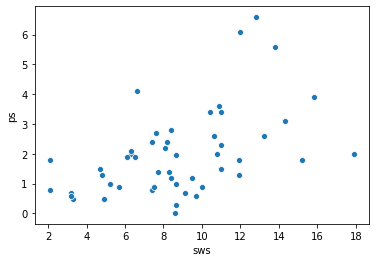

In [19]:
sns.scatterplot(x='sws',y='ps',data=animals2)

In [20]:
animals2 = animals.copy()
# impute mean for the following vars: sws, ps, ts, mls, gt
sws_median = animals2['sws'].median()
animals2['sws'] = animals2['sws'].fillna(sws_median)

ps_median = animals2['ps'].median()
animals2['ps'] = animals2['ps'].fillna(ps_median)

ts_median = animals2['ts'].median()
animals2['ts'] = animals2['ts'].fillna(ts_median)

mls_median = animals2['mls'].median()
animals2['mls'] = animals2['mls'].fillna(mls_median)

gt_median = animals2['gt'].median()
animals2['gt'] = animals2['gt'].fillna(gt_median)

# summarize the number of rows and columns in the dataset
print(animals2.shape)

(62, 11)


In [21]:
print(animals.describe())
print("----------------------------------------------------------------------------------")
print(animals2.describe())

                bw          brw        sws         ps         ts         mls  \
count    62.000000    62.000000  48.000000  50.000000  58.000000   58.000000   
mean    198.789984   283.134194   8.672917   1.972000  10.532759   19.877586   
std     899.158011   930.278942   3.666452   1.442651   4.606760   18.206255   
min       0.005000     0.140000   2.100000   0.000000   2.600000    2.000000   
25%       0.600000     4.250000   6.250000   0.900000   8.050000    6.625000   
50%       3.342500    17.250000   8.350000   1.800000  10.450000   15.100000   
75%      48.202500   166.000000  11.000000   2.550000  13.200000   27.750000   
max    6654.000000  5712.000000  17.900000   6.600000  19.900000  100.000000   

               gt         pi        sei        odi  
count   58.000000  62.000000  62.000000  62.000000  
mean   142.353448   2.870968   2.419355   2.612903  
std    146.805039   1.476414   1.604792   1.441252  
min     12.000000   1.000000   1.000000   1.000000  
25%     35.750

In [22]:
sns.scatterplot(x='sws',y='ts',data=animals2, hue=animals2['sws_na'])

KeyError: 'sws_na'

In [23]:
sns.scatterplot(x='sws',y='gt',data=animals2, hue=animals2['sws_na'])

KeyError: 'sws_na'

### Machine Learning imputation: kNN imputation


In [24]:
X_train = animals2.copy()
X_train.dropna(inplace=True)
y_train = X_train.loc[:,('sws')]
X_train = X_train.loc[:,('bw','brw','pi','sei','odi')]
print(y_train.shape)
print(X_train.shape)


(62,)
(62, 5)


In [25]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=5)  
reg.fit(X_train, y_train)  

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [26]:
X_test = animals2.loc[(animals2['sws'].isnull()),('bw','brw','pi','sei','odi')]

y_pred = reg.predict(X_test)

ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required.

In [27]:
len(y_pred)
y_train1 = pd.DataFrame({'y':y_train, 'bw':X_train['bw']})
y_train1['cl'] = 0

y_pred1 = pd.DataFrame({'y':y_pred, 'bw':X_test['bw']})
y_pred1['cl'] = 1

y = pd.concat([y_train1,y_pred1])
y.head()


ValueError: array length 14 does not match index length 0

In [28]:
sns.scatterplot(x='bw',y='y', data=y,hue='cl')


NameError: name 'y' is not defined

In [29]:
### pip install fancyimpute
#    import fancyimpute 

In [30]:
#   fancyimpute.kNN(k=x).complete(data matrix)

In [31]:
#   fancyimpute.MICE().complete(data matrix)

# Outlier Detection
 
### Graphical methods

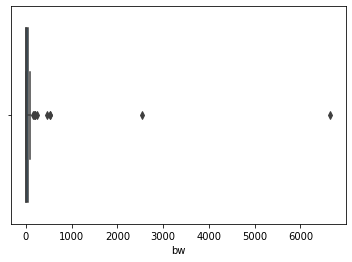

In [32]:
## Using box (Wiskers) plot
outl = sns.boxplot(animals['bw'])

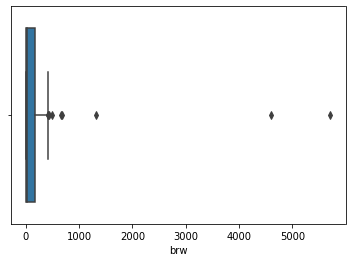

In [33]:
outl = sns.boxplot(animals['brw'])

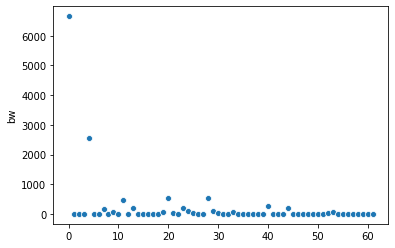

In [34]:
###  using scatterplots
sns.scatterplot(x=animals.index,y=animals['bw'])

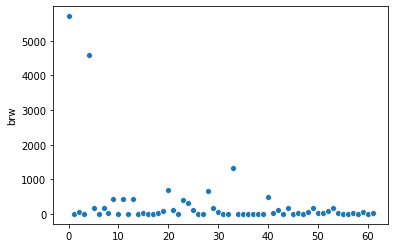

In [35]:
sns.scatterplot(x=animals.index,y=animals['brw'])

## Using Mathematical Functions

### Z-Score

In [36]:
from scipy import stats
z = np.abs(stats.zscore(animals.bw))
print(z)



[7.23777846 0.22176817 0.21909403 0.22185786 2.63288473 0.21106041
 0.22286361 0.04349251 0.21918934 0.16440601 0.22241287 0.29848279
 0.22227272 0.01310717 0.2228053  0.2195257  0.22200923 0.22266515
 0.22130846 0.15561557 0.37024155 0.19187616 0.22275485 0.00920532
 0.1275848  0.18215509 0.22277615 0.22172332 0.3612717  0.11076634
 0.18364633 0.22288379 0.22287818 0.1533731  0.22275261 0.22137574
 0.22286361 0.22283558 0.2209833  0.21896509 0.05741823 0.22235121
 0.21167709 0.221073   0.00761314 0.22008632 0.21808156 0.22257545
 0.21814099 0.21526503 0.22204847 0.21885297 0.20626155 0.1606611
 0.22131967 0.22282212 0.22188029 0.22064694 0.22277279 0.21819144
 0.21896509 0.21834841]


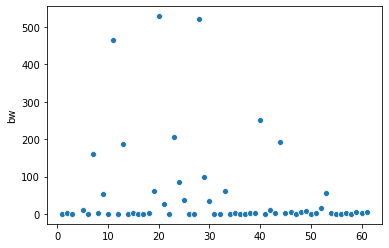

In [37]:
## Eliminating those points
animals2 = animals.copy()
threshold = 2.5
animals2 = animals2[(z < threshold)]

sns.scatterplot(x=animals2.index,y=animals2['bw'])


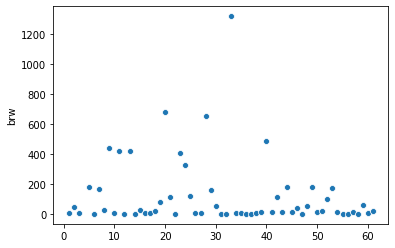

In [38]:
sns.scatterplot(x=animals2.index,y=animals2['brw'])